In [32]:
# import usual suspects

%matplotlib inline
import pandas as pd
import numpy as np
from numpy import arange
import math

import seaborn as sns
sns.set_style("white")

import scipy as sp
from scipy import linalg, optimize

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA

import collections
from collections import Counter

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.path as mpath
from matplotlib.dates import DateFormatter

import calendar
import datetime as dt
fromtimestamp = dt.datetime.fromtimestamp
from datetime import datetime

from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot

In [33]:
# import cleaned weekly ufo data
ufo = pd.read_csv('../Data/Datasets/cleandate_weekly_reval.csv',index_col=0)
# copy into w(orking)ufo df
wufo = ufo.copy().rename(columns={'rel_val_alltime':'weekly_ufopct'})
# confirm
wufo.head(1)

,startdateweek,weekly_ufocount,weekly_ufopct,year,month,weeknum,week_id
0,2014-07-06,470,100.0,2014,7,27,2014-27


In [34]:
# add date col and sort values
wufo['date'] = ufo['startdateweek']
wufo = wufo.sort_values('date')
wufo['const'] = 1
# confirm
wufo.head(2)

,startdateweek,weekly_ufocount,weekly_ufopct,year,month,weeknum,week_id,date,const
763,2006-01-08,3,0.638298,2006,1,1,2006-1,2006-01-08,1
758,2006-01-15,8,1.702128,2006,1,2,2006-2,2006-01-15,1


In [35]:
# make date col datetime and set index to date
wufo.date = pd.to_datetime(wufo.date)
wufo.index = pd.DatetimeIndex(wufo.date, freq='W')
# confirm
wufo.index

DatetimeIndex(['2006-01-08', '2006-01-15', '2006-01-22', '2006-01-29',
               '2006-02-05', '2006-02-12', '2006-02-19', '2006-02-26',
               '2006-03-05', '2006-03-12',
               ...
               '2020-07-05', '2020-07-12', '2020-07-19', '2020-07-26',
               '2020-08-02', '2020-08-09', '2020-08-16', '2020-08-23',
               '2020-08-30', '2020-09-06'],
              dtype='datetime64[ns]', name='date', length=766, freq='W-SUN')

In [36]:
#############################################################################################
#
# creating time series plot for monthly means of ufo percentage vals all time

<AxesSubplot:xlabel='date'>

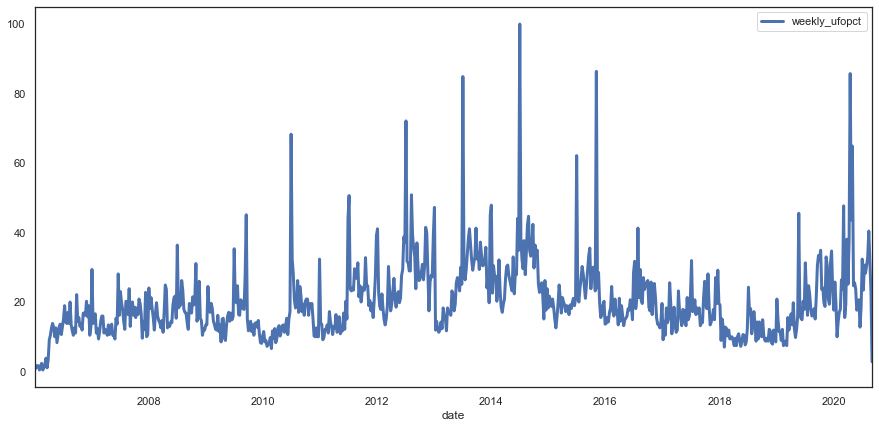

In [37]:
# creating time series plot for measured relative ufo vals all time
data = wufo.get('weekly_ufopct')
df = pd.DataFrame(data)
df.plot(figsize=(15,7))

In [38]:
# creating time series for months
data = wufo.get(['weekly_ufopct','year','month']).sort_values(['month','year'])
# store into df
df = pd.DataFrame(data.loc[data['month'] <9])

# export df and set to comment after
#df.to_csv('../Data/Datasets/nb7_weekly_ufo-jan-sept.csv')

In [39]:
# get monthly means for corona months (jan-aug)
months = [x for x in range(1,9)]
data = dict.fromkeys(months)

In [40]:
# function for mean data
def monthlymeans(m,df):
    data[m] = df.loc[df['month']==m].get('weekly_ufopct').mean()

In [41]:
# update data dict
for m in months:
    monthlymeans(m,df)

In [42]:
# storing vals for monthly means
monthvals = [x for x in data.keys()]
meanvals = [x for x in data.values()]
data = {'Month': monthvals,'Monthly_Mean_Ufo':meanvals}
# df with mean vals
df = pd.DataFrame(data)
# datetime index
df.index=df['Month']
df = df.drop(columns=['Month'])
#confirm
df.head(1)

,Monthly_Mean_Ufo
Month,
1,17.266776


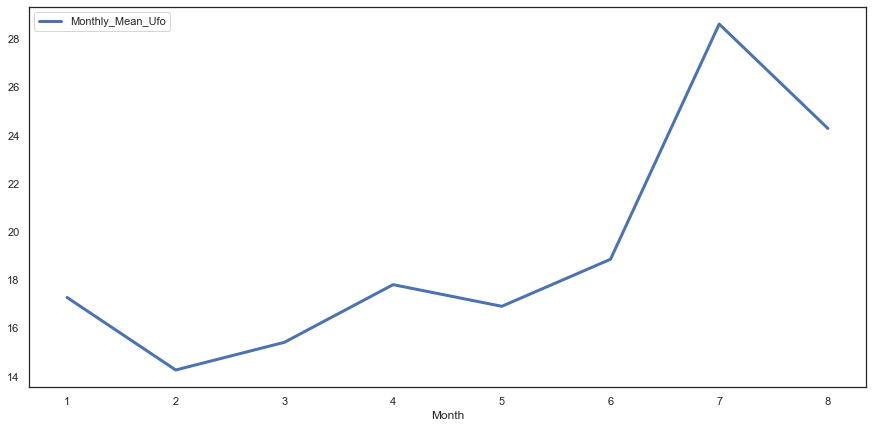

In [43]:
# plot monthly means
plot1 = df.plot(figsize=(15,7))


In [44]:
########################## ########################## ########################## ##########################
########################## ########################## ########################## ##########################
########################## ########################## ########################## ##########################
#
# creating time series plot for monthly means before corona compared to real measurements during corona
#
#                corona time defined as = 2019 Week 35 (2019/09/02) - 2020 Week 35 (2020/08/30)
#

In [45]:
########################## ########################## ##########################

In [46]:
# df with only months 1-9

df = pd.DataFrame(wufo.get(['date','weekly_ufopct','month']))
df['WeekDate'] = df['date'].astype(str)

In [47]:
########################## ########################## ##########################

In [48]:
# m(ean) b(efore) = df before for mean vals before corona

mb = pd.DataFrame(df.loc[df['WeekDate']<'2019-09-02'])

# get monthly means before corona for all months (jan-aug)
months = [x for x in range(1,9)]
mbdata = dict.fromkeys(months)

# storages for months and means -mb-
monthvals = [x for x in mbdata.keys()]
meanvals = [x for x in mbdata.values()]

In [49]:
# get the mean vals
for m in months:
    monthmean = mb.loc[mb['month']==m].get('weekly_ufopct').mean()
    mbdata[m] = monthmean

# list to store means
means = [mean for mean in mbdata.values()]

# dict to store data
mbdata = {'Month':months,'Mean UFOs %':means}

# final df for means before corona
mbdf = pd.DataFrame(mbdata)

# review
mbdf.head()

,Month,Mean UFOs %
0,1,17.206139
1,2,13.924772
2,3,14.320522
3,4,15.814440
4,5,15.716777


In [50]:
########################## ########################## ##########################

In [51]:
# r(eal)c(orona) df corona for real vals in corona timeframe

rc = pd.DataFrame(df.loc[df['WeekDate']>='2019-09-02'])

# get monthly sums for corona time
months = [x for x in range(1,9)]

rcdata = dict.fromkeys(months)

# storages for monthly sums -rc-
monthvals = [x for x in data.keys()]
realvals = [x for x in data.values()]

In [52]:
# get the sum vals
for m in months:
    monsum = rc.loc[rc['month']==m].get('weekly_ufopct').sum()
    monlen = len(rc.loc[rc['month']==m].get('weekly_ufopct'))
    monmean= monsum/monlen
    rcdata[m] = monmean

In [53]:
# list to store means
monmeans = [s for s in rcdata.values()]

# dict to store data
rcdata = {'Month':months,'Real Percentage UFOs':monmeans}

# final df for means before corona
rcdf = pd.DataFrame(rcdata)

# confirm
rcdf.head()

,Month,Real Percentage UFOs
0,1,18.191489
1,2,18.882979
2,3,28.851064
3,4,48.031915
4,5,31.319149


In [54]:
########################## ########################## ##########################
# plot mean and real vals


In [55]:
mbdf['timeframe']= 'UFOs before corona (monthly mean)'

bv = mbdf['Mean UFOs %'].to_list()
tb = mbdf['timeframe'].to_list()

mbdf.head()

,Month,Mean UFOs %,timeframe
0,1,17.206139,UFOs before corona (monthly mean)
1,2,13.924772,UFOs before corona (monthly mean)
2,3,14.320522,UFOs before corona (monthly mean)
3,4,15.814440,UFOs before corona (monthly mean)
4,5,15.716777,UFOs before corona (monthly mean)


In [56]:
rcdf['timeframe'] = 'UFOs during corona (monthly mean)'

cv = rcdf['Real Percentage UFOs'].to_list()
tc = rcdf['timeframe'].to_list()

rcdf.head()

,Month,Real Percentage UFOs,timeframe
0,1,18.191489,UFOs during corona (monthly mean)
1,2,18.882979,UFOs during corona (monthly mean)
2,3,28.851064,UFOs during corona (monthly mean)
3,4,48.031915,UFOs during corona (monthly mean)
4,5,31.319149,UFOs during corona (monthly mean)


In [57]:
t = tb+tc 
v = bv + cv


In [58]:
data2 = {'Timeframe:':t, 'UFOs':v}
df2 = pd.DataFrame(data2)
df2['Month']=[x for x in range(1,9)]+[x for x in range(1,9)]
df2

,Timeframe:,UFOs,Month
0,UFOs before corona (monthly mean),17.206139,1
1,UFOs before corona (monthly mean),13.924772,2
2,UFOs before corona (monthly mean),14.320522,3
3,UFOs before corona (monthly mean),15.814440,4
4,UFOs before corona (monthly mean),15.716777,5
5,UFOs before corona (monthly mean),18.932624,6
6,UFOs before corona (monthly mean),28.605201,7
7,UFOs before corona (monthly mean),23.679805,8
8,UFOs during corona (monthly mean),18.191489,1
9,UFOs during corona (monthly mean),18.882979,2


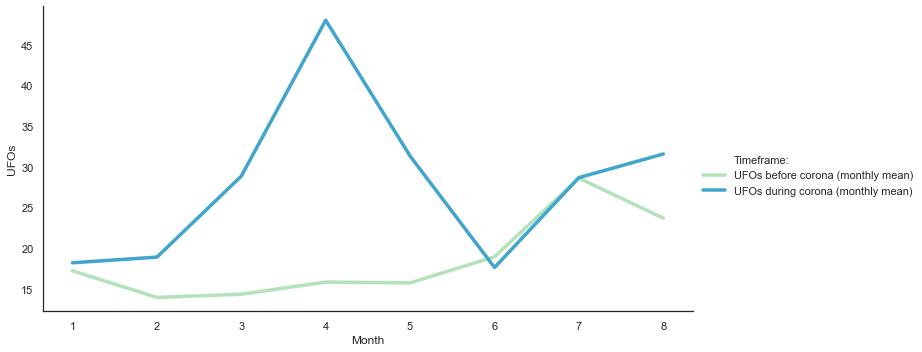

In [62]:
sns.set_context(font_scale=1.5, rc={"lines.linewidth": 3.5})
  
sns.relplot(x="Month", y="UFOs", hue="Timeframe:", kind="line", data=df2, aspect=12/6,palette='GnBu');

sns.despine()


In [60]:
# export and set to comment after

#df2.to_csv('../Data/Datasets/monmeans_corona.csv')

In [31]:
#rcdf.to_csv('../Data/Datasets/nb7_corona.csv')

In [32]:
#mbdf.to_csv('../Data/Datasets/nb7_before.csv')